# Importing Packages

In [9]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Loading Wine Dataset from UCI ML Repositary

In [3]:
wine = pd.read_csv('/Users/Asus/Documents/Atmel Studio/wine.csv')

In [4]:
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
wine.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [22]:
wine.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

# Loading Features & Target

In [4]:
X = wine.iloc[:, 1:14].values  
y = wine.iloc[:, 0].values  

# Split Train and Test Sets

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fitting the Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier(n_estimators=900)
randf.fit(X_train,y_train)
y_pred=randf.predict(X_test)

# Predicting Metrics

In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

0.044444444444444446
[[17  0  0]
 [ 1 19  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        17
           2       1.00      0.90      0.95        21
           3       0.88      1.00      0.93         7

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


In [21]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Feature Importance Categorization

In [23]:
randf.feature_importances_

array([0.10868794, 0.0305158 , 0.01718754, 0.02597425, 0.02396491,
       0.05353761, 0.13958212, 0.01154663, 0.02189092, 0.15501903,
       0.08734378, 0.13238358, 0.19236588])

 Sorting the Features of Wines in each columns that to prioritizing the importance. So the Larger value the importance is high.
According to that hypothesis we are going to reasamble the List

In [26]:
features = wine.columns.values.tolist()[1:14]
feature_pro = pd.Series(randf.feature_importances_,index=features).sort_values(ascending=False)

In [27]:
feature_pro

Proline                 0.192366
Color.int               0.155019
Flavanoids              0.139582
OD                      0.132384
Alcohol                 0.108688
Hue                     0.087344
Phenols                 0.053538
Malic.acid              0.030516
Acl                     0.025974
Mg                      0.023965
Proanth                 0.021891
Ash                     0.017188
Nonflavanoid.phenols    0.011547
dtype: float64

# Vizualing the Importances of the Features 

No handles with labels found to put in legend.


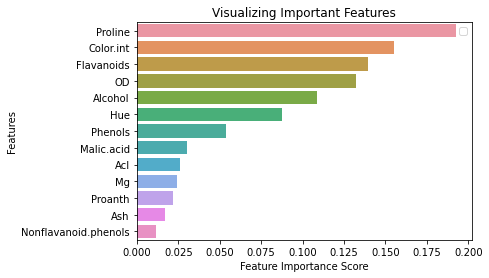

In [30]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_pro, y=feature_pro.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [5]:
wine['Proline'].describe()

count     178.000000
mean      746.893258
std       314.907474
min       278.000000
25%       500.500000
50%       673.500000
75%       985.000000
max      1680.000000
Name: Proline, dtype: float64

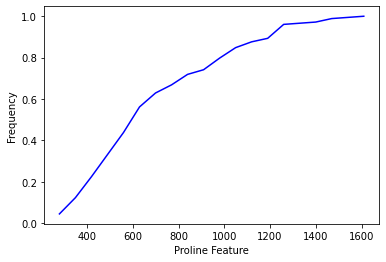

In [6]:
values, base = np.histogram(wine['Proline'], bins=20)
Accumalate = np.cumsum(values/wine.shape[0])
plt.plot(base[:-1], Accumalate, c='blue')
plt.xlabel('Proline Feature')
plt.ylabel('Frequency')
plt.show()

Since the median "Proline Feature" is 673.5 and mean quaity is ∼750 , we classify Wine as 'Feature Brands' if Proline is less then or equal to 675 , otherwise we classify the  wine as 'Premiere Brands'. 
We repleace the column Proline with the value 0 for 'Featured' wine and the value 1 for 'Premiere' wine.

In [8]:
indeksDaarlig = wine.loc[wine['Proline'] <= 675].index
indeksGod = wine.loc[wine['Proline'] > 675].index
wine.iloc[indeksDaarlig, wine.columns.get_loc('Proline')] = 0
wine.iloc[indeksGod, wine.columns.get_loc('Proline')] = 1

In [10]:
wine['Proline'].value_counts()

0    91
1    87
Name: Proline, dtype: int64

# Decision Tree

In [11]:
x = wine.drop('Proline',axis=1)
y = wine['Proline']

In [16]:
#Choosing 40% as training data.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.40, random_state = 42)

In [19]:
# Making a decision tree with two levels.
clfTre = tree.DecisionTreeClassifier(max_depth=3)
clfTre.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=3)

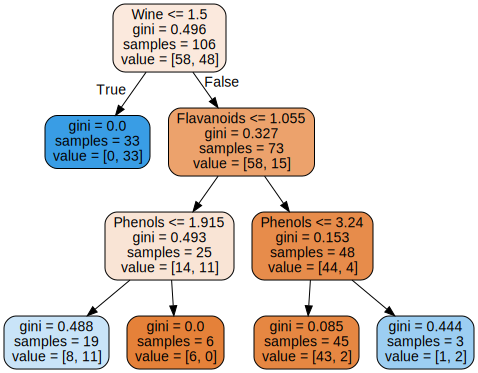

In [20]:
#Visualizing the decision tree
dot_data = tree.export_graphviz(clfTre, out_file=None, max_depth=3, feature_names=list(x.columns.values), filled=True, rounded=True)
valgTre = graphviz.Source(dot_data) 
valgTre

We observe that our model uses the all levels of Features in Wine to first to make a decision. 
Also, note that based on Proline level if the the Flavanoids levels & Phenols Level are high, 
then the wine is most likely 'Premiere Brand'. On the other hand, is the Proline level 
is lower than 1.5 then the wine  is most likely 'Feature Brand'.

We examine the prediction accuracy of the decision tree.

In [21]:
utfall = (clfTre.predict(xTest) == yTest).value_counts()
print("The Decision Tree predicts the test data in", (utfall[1]/(utfall[0]+utfall[1]))*100 , "% of the cases.")

The Decision Tree predicts the test data in 75.0 % of the cases.


# Random Forest

We use a Random Forest to make a random selection of decision trees with increased depth

In [22]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(xTrain, yTrain)

RandomForestClassifier(max_depth=10, random_state=0)

In [23]:
utfall = (rf.predict(xTest) == yTest).value_counts()
print("The Decision tree Predicts the test data in", (utfall[1]/(utfall[0]+utfall[1]))*100 , "% of the cases.")

The Decision tree Predicts the test data in 79.16666666666666 % of the cases.


Inorder to Improving the Decision Trees Prediction , We are using Random Forest for Random Selection in order to improve the Accuracy of Our Decision Tree. 
By Comparing the Two Accuracies obtain from the Descion Trees with or Without Randomforest .

With Random Froest     :- 79.16 %
WIthout Random Forest  :- 75.00 %   


## So the Conclusion is with Random Forest, The Accuracy of the Decision Trees is being uplifted.